## Building a model recognizing Digits tained on MNIST dataset 



### Import libraries 

In [1]:
import os 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
from keras.layers import Dropout, Flatten ,BatchNormalization , MaxPool2D
from keras.layers.convolutional import Conv2D
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split


Using TensorFlow backend.


### Load the dataset 

In [2]:
train=pd.read_csv('mnist data/train.csv')
test=pd.read_csv('mnist data/test.csv')

In [3]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
print(train.shape)
print(test.shape)

(42000, 785)
(28000, 784)


### Splitting data 

In [5]:
# split data 
df_train=train.copy()
y=df_train['label']
X=df_train.drop(['label'],axis=1)
# transform data labels to one hotencoder
y = to_categorical(y,num_classes=10)

In [10]:
X.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Normalizing data

In [11]:
# normalizing data for trai and tes set 
x=X/255.0
test=test/255.0

## Reshaping data 

In [15]:
import numpy as np 
# reshapein 3 dimensions (height = 28px, width = 28px , canal = 1)
X = np.array(x).reshape(-1,28,28,1)
test = np.array(test).reshape(-1,28,28,1)
#show shapes 
print(X.shape)
print(test.shape )

(42000, 28, 28, 1)
(28000, 28, 28, 1)


### Train Test Split 

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=4)
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((33600, 28, 28, 1), (33600, 10), (8400, 28, 28, 1), (8400, 10))

### Show some images 

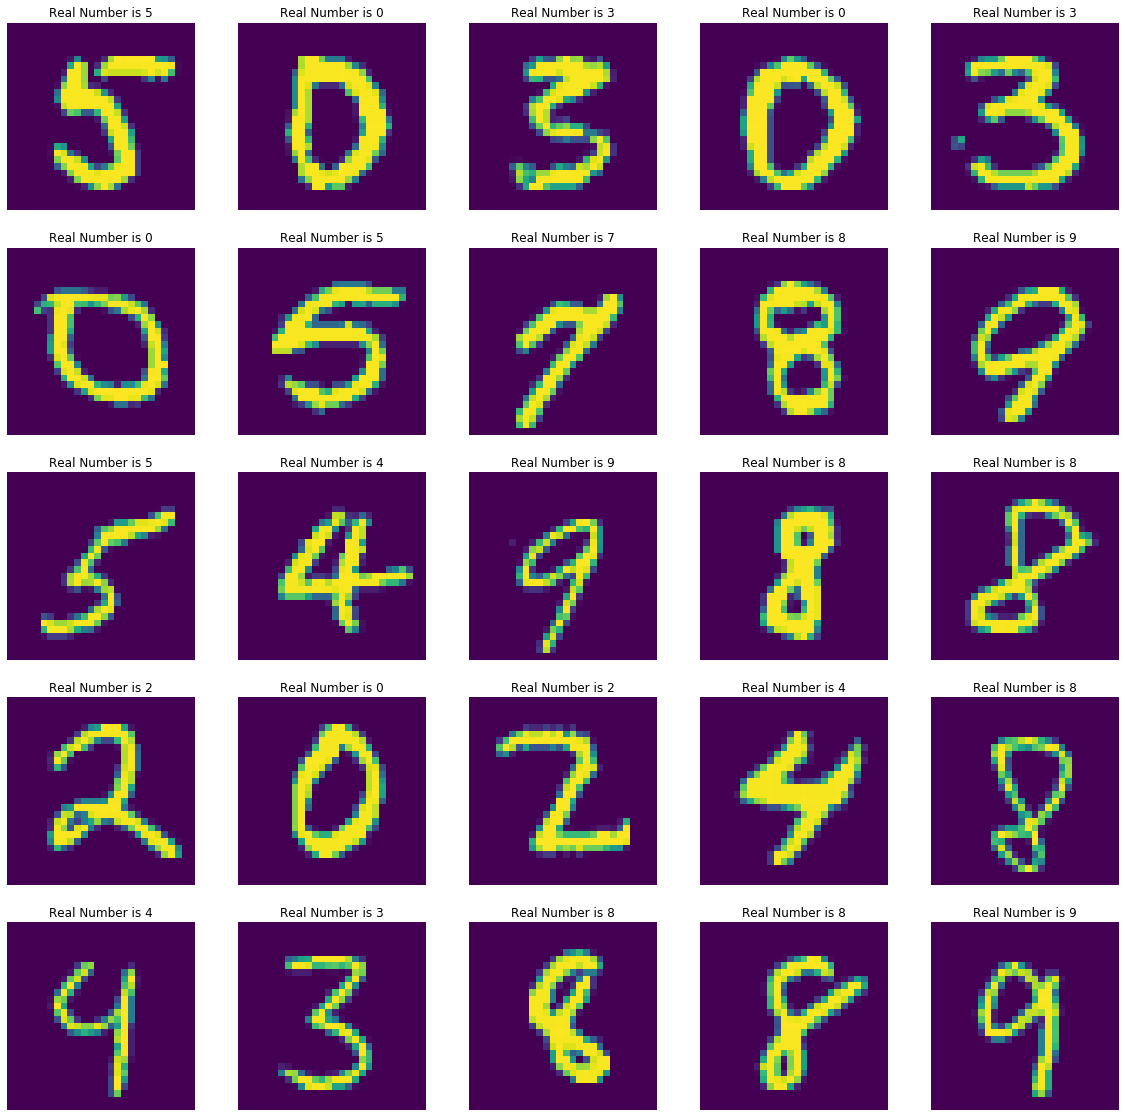

In [17]:
fig, axis = plt.subplots(5, 5, figsize=(20, 20))
for i, ax in enumerate(axis.flat):
    ax.imshow(X_train[i].reshape(28,28))
    ax.axis('off')
    ax.set(title = f"Real Number is {y_train[i].argmax()}")

###  Build the Neural Network 

In [18]:
## the neural network archiecture will be like this :
 ##1 convlution layer
 ##2 relu layer
 ##3 pooling layer
 ##4 fully connected

model = Sequential()
# First Layer 
model.add(Conv2D(filters = 64, kernel_size = (3,3) ,activation ='relu', input_shape = (28,28,1)))
model.add(Conv2D(filters = 56, kernel_size = (3,3),activation ='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.2))

#Second alyer 
model.add(Conv2D(filters = 64, kernel_size = (3,3),activation ='relu'))
model.add(Conv2D(filters = 48, kernel_size = (3,3),activation ='relu'))
model.add(Conv2D(filters = 32, kernel_size = (3,3),activation ='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.2))

#Third Layer 
model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dense(128, activation = "relu"))
model.add(Dense(64, activation = "relu"))
model.add(Dropout(0.4))

#Output Layer 
model.add(Dense(10, activation = "softmax"))
model.compile(Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

### Train the Model 

In [22]:
history = model.fit(X_train,y_train, batch_size=128,
                              epochs = 5, validation_data = (X_test,y_test),
                              verbose = 2)

Train on 33600 samples, validate on 8400 samples
Epoch 1/5
 - 159s - loss: 0.3727 - accuracy: 0.8838 - val_loss: 1.1623 - val_accuracy: 0.6231
Epoch 2/5
 - 146s - loss: 0.1004 - accuracy: 0.9729 - val_loss: 0.0639 - val_accuracy: 0.9817
Epoch 3/5
 - 144s - loss: 0.0667 - accuracy: 0.9811 - val_loss: 0.0617 - val_accuracy: 0.9812
Epoch 4/5
 - 146s - loss: 0.0550 - accuracy: 0.9853 - val_loss: 0.0405 - val_accuracy: 0.9875
Epoch 5/5
 - 150s - loss: 0.0462 - accuracy: 0.9873 - val_loss: 0.0523 - val_accuracy: 0.9864


### Plot the Results 

Text(0.5, 0, 'epochs')

<Figure size 432x288 with 0 Axes>

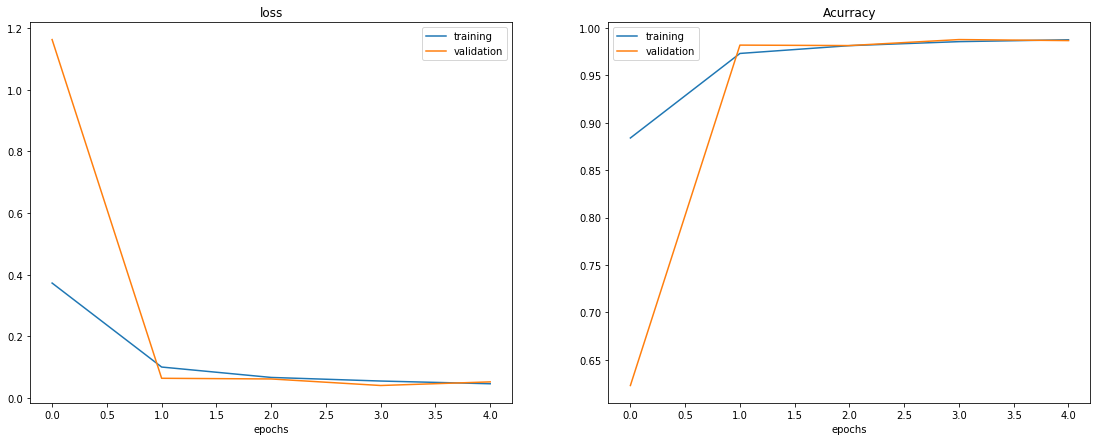

In [24]:
# Plot training loss vs validation loss 
plt.figure()
fig,(ax1, ax2)=plt.subplots(1,2,figsize=(19,7))
ax1.plot(history.history['loss'])
ax1.plot(history.history['val_loss'])
ax1.legend(['training','validation'])
ax1.set_title('loss')
ax1.set_xlabel('epochs')
## plot training accuracy vs validation accuracy 
ax2.plot(history.history['accuracy'])
ax2.plot(history.history['val_accuracy'])
ax2.legend(['training','validation'])
ax2.set_title('Acurracy')
ax2.set_xlabel('epochs')

In [26]:
## show scores 
score =model.evaluate(X_test,y_test,verbose=0)
print('Loss : {:.2f}'.format(score[0]))
print('Test Accuracy: {:.2f}'.format(score[1]))

Loss : 0.05
Test Accuracy: 0.99


### Predictions of our Model 

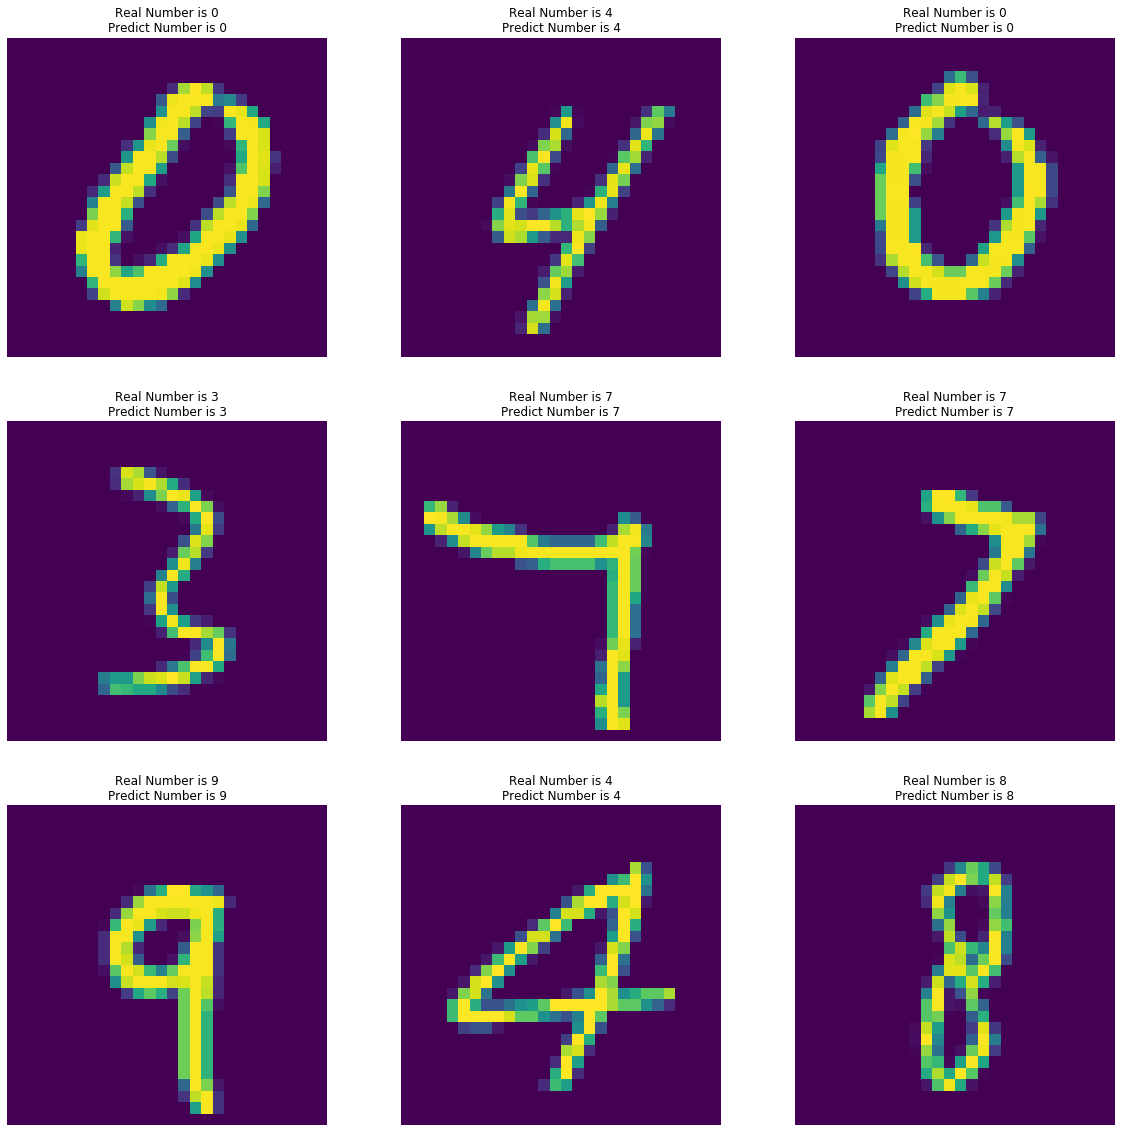

In [29]:
# Plot the predictions 
preds = model.predict(X_test)
X_test__ = X_test.reshape(X_test.shape[0], 28, 28)

fig, axis = plt.subplots(3, 3, figsize=(20, 20))
for i, ax in enumerate(axis.flat):
    ax.imshow(X_test__[i])
    ax.axis('off')
    ax.set(title = f"Real Number is {y_test[i].argmax()}\nPredict Number is {preds[i].argmax()}");

### Submit the Results into a csv file 

In [34]:
predictions=model.predict_classes(X_test)

In [35]:
predictions[:10]

array([0, 4, 0, 3, 7, 7, 9, 4, 8, 7], dtype=int64)

In [48]:
#Reverse y_test from one hot encoder to an array 
y_classes = [np.argmax(y, axis=None, out=None) for y in y_test]
# put true values on a Series list 
true_values=pd.Series(y_classes)
# predicted Values 
predicted_values = pd.Series(predictions)
# create a submission dataframe 
submission = pd.DataFrame({'ImageId':predicted_values.index,'Real Number':true_values,'Predicted Number':predicted_values })
# save to a csv file 
submission.to_csv('mnist_submission.csv', index=False)
print(" Submission  successfully saved!")

 Submission  successfully saved!


In [49]:
submission.head()

,ImageId,Real Number,Predicted Number
0,0,0,0
1,1,4,4
2,2,0,0
3,3,3,3
4,4,7,7


### Save the Model 

In [50]:
model.save('mnistModel2.h5')
print('Model saved !!!')


Model saved !!!
